# Project - Case study on Fake News Detection

## Introduction:
A fake are those news stories that are false.The story itself is fabricated, with no verifiable facts, sources, or quotes.
When someone (or something like a bot) impersonates someone or a reliable source to false spread information, that can also be considered as fake news. In most cases, the people creating this false information have an agenda, that can be political, economical or to change the behavior or thought about a topic. It often has the aim of damaging the reputation of a person or entity, or making money through advertising revenue. One common prevalence of fake news is the social media, especially the Facebook News Feed.

### Types of Fake News:
- Clickbait
- Propaganda
- Rumors
- Manipulation 
- Misleading Headlines
- Misinformation etc.

### How to Identify it:
1). Consider the source (to understand its mission and purpose)

2). Read beyond the headline (to understand the whole story)

3). Check the authors (to see if they are real and credible)

4). Assess the supporting sources (to ensure they support the claims)

5). Check the date of publication (to see if the story is relevant and up to date)

6). Ask if it is a joke (to determine if it is meant to be satire)

7). Ask experts (to get confirmation from independent people with knowledge)

## Problem statement:
The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed. 

In this project, you are given a dataset in the fake-news_data.zip folder. The folder contains a CSV files train_news.csv and you have to use the train_news.csv data to build a model to predict whether a news is fake or not fake. You have to try out different models on the dataset, evaluate their performance, and finally report the best model you got on the data and its performance.

## Data- Description:
There are 6 columns in the dataset provided to you. The description of each of the column is given below:
- “id”:  Unique id of each news article
- “headline”:  It is the title of the news.
- “news”:  It contains the full text of the news article
- “Unnamed:0”:  It is a serial number
- “written_by”:  It represents the author of the news article
- “label”:  It tells whether the news is fake (1) or not fake (0).

## Steps to Follow:
- Perform proper data cleaning and text exploration. 
- Focus on data visualization and infer details from it. 
- Try to infer unique patterns from the data and try to generate new features. 
- Use 4-5 models for training, do proper hyperparameter tuning and choose the right evaluation metrics to finalize your model. 
- Test your predictions on multiple metrics like log loss, Recall and Precision and F1 Score.   
- Create a detailed report mentioning all the steps in the format of sample documentation file. 
- Create a powerpoint presentation of the project. 

## Submission:
You have to submit the jupyter notebook, in which you have built your best performing model. Your jupyter notebook should be well commented so that it can be easily understood what are you actually trying to do in the code. Also mention which is your best performing model and the measure of its performance (accuracy score , f1 score etc)



### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data
df=pd.read_csv('train_news.csv')
df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [3]:
# Since, I find the Unnamed:0,written_by columns Unnecessary and doesn't contribute any relevant information.So, I drop it
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.tail()

,id,headline,written_by,news,label
20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0
20799,15660,Emory University to Pay for ’100 Percent’ of U...,Tom Ciccotta,"Emory University in Atlanta, Georgia, has anno...",0


### Data Analysis

In [4]:
# shape(rows,columns)
df.shape

(20800, 5)

In [5]:
# Datatypes
df.dtypes

id             int64
headline      object
written_by    object
news          object
label          int64
dtype: object

In [6]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20800 non-null  int64 
 1   headline    20242 non-null  object
 2   written_by  18843 non-null  object
 3   news        20761 non-null  object
 4   label       20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


### Missing Values

In [7]:
# Missing Values
df.isna().sum()

id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [8]:
df.shape

(20800, 5)

In [9]:
# Duplicated Entries
df.duplicated().sum()

0

In [10]:
df['headline'].head()

0    Ethics Questions Dogged Agriculture Nominee as...
1    U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2    Cotton to House: ’Do Not Walk the Plank and Vo...
3    Paul LePage, Besieged Maine Governor, Sends Co...
4                         A Digital 9/11 If Trump Wins
Name: headline, dtype: object

In [11]:
df['written_by'].value_counts()

Pam Key                                             243
admin                                               193
Jerome Hudson                                       166
Charlie Spiering                                    141
John Hayward                                        140
                                                   ... 
Chanda Chisala                                        1
customize your own jerseys                            1
Kimiko de Freytas-Tamura and Elisabetta Povoledo      1
Michael J. de la Merced and Vindu Goel                1
Michael Corkery and Michael Wines                     1
Name: written_by, Length: 4201, dtype: int64

In [12]:
df['news'][0]

'WASHINGTON  —   In Sonny Perdue’s telling, Georgians were growing weary of the corruption and scandals in their state when he took over as governor in 2003  —   a time when he gave his own version of a “drain the swamp” pledge. “My first goal as governor is to restore public trust in state government by changing the culture of state government,” Mr. Perdue told a leadership conference at Kennesaw State University in April 2003. “Our form of government depends on a mutual bond of trust between the people and their government. But people have become cynical about their government. ” But Mr. Perdue, a Republican who is awaiting confirmation to serve as President Trump’s agriculture secretary, became a target of frequent criticism that he was failing to honor his own ethics pledge during his eight years as governor. The criticism centers on the fact that, as Mr. Trump has, he continued to own or help run his family business ventures  —   four   companies  —   while serving as governor. Mr

In [13]:
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [14]:
# Shuffle data to prevent bias
from sklearn.utils import shuffle
data = shuffle(df)
data = df.reset_index(drop=True)

In [15]:
data.head()

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


### Data cleaning

In [16]:
# Remove Id ( we will only use text)
data.drop(["id"],axis=1,inplace=True)

In [17]:
# Remove written_by (since, it is name's of the author)
data.drop(["written_by"],axis=1,inplace=True)

In [18]:
data.drop(["headline"],axis=1,inplace=True)

In [19]:
data.dropna(how='any',axis=0,inplace=True)
data.head()

,news,label
0,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,HOUSTON — Venezuela had a plan. It was a ta...,0
2,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,Finian Cunningham has written extensively on...,1


In [20]:
data.isna().sum()

news     0
label    0
dtype: int64

In [21]:
# Convert to lower_case
data['news'] = data['news'].apply(lambda x: x.lower())

In [22]:
# Remove punctuation
import string
def punctuation_removal(news):
    all_list = [char for char in news if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
data['news'] = data['news'].apply(punctuation_removal)

In [23]:
# Remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['news'] = data['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lklqy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Exploration

label
0    10387
1    10374
Name: news, dtype: int64


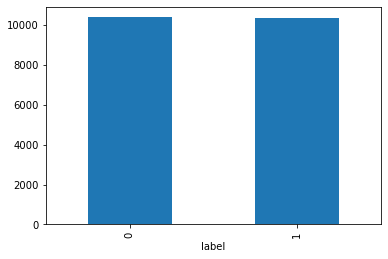

In [24]:
# Number of fake & real articles(where 0:not-fake,1:fake)
print(data.groupby(['label'])['news'].count())
data.groupby(['label'])['news'].count().plot(kind='bar')
plt.show()

### Word Cloud

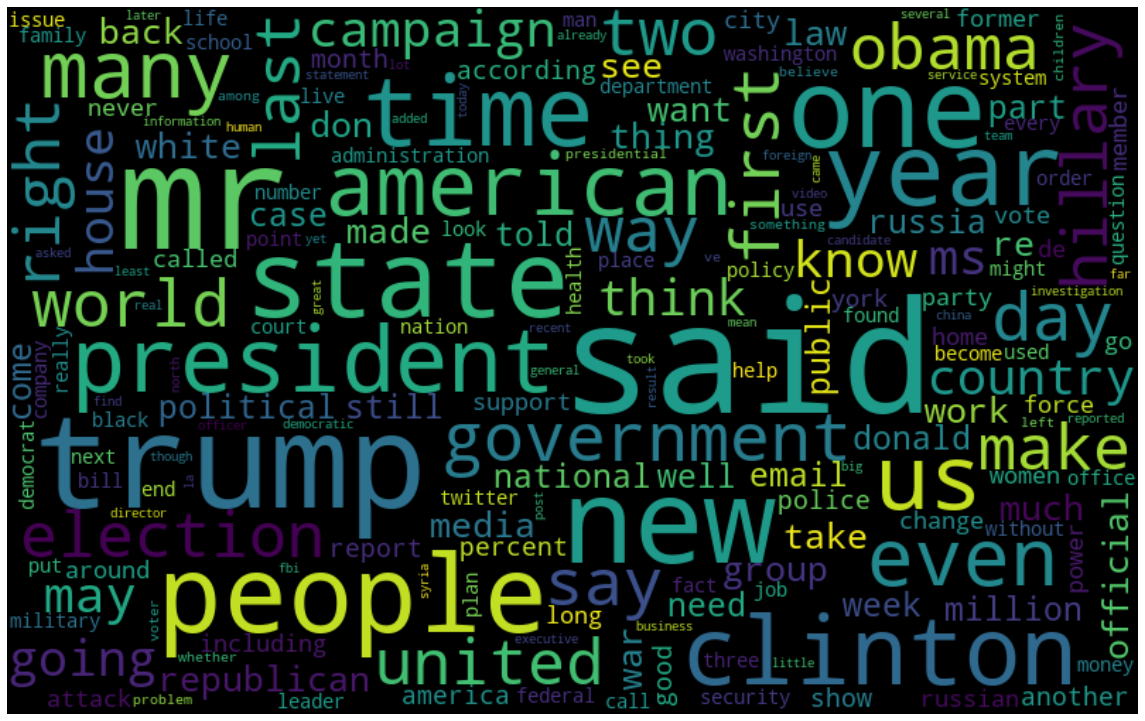

In [25]:
# word cloud on news article
from wordcloud import WordCloud
real_data = data['news']
all_words = ' '.join([text for text in real_data])
wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110,
 collocations = False).generate(all_words)
plt.figure(figsize=(25,13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Most Frequent words

In [26]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(news, quantity):
    all_words = ' '.join([text for text in data['news']])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(18,7))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

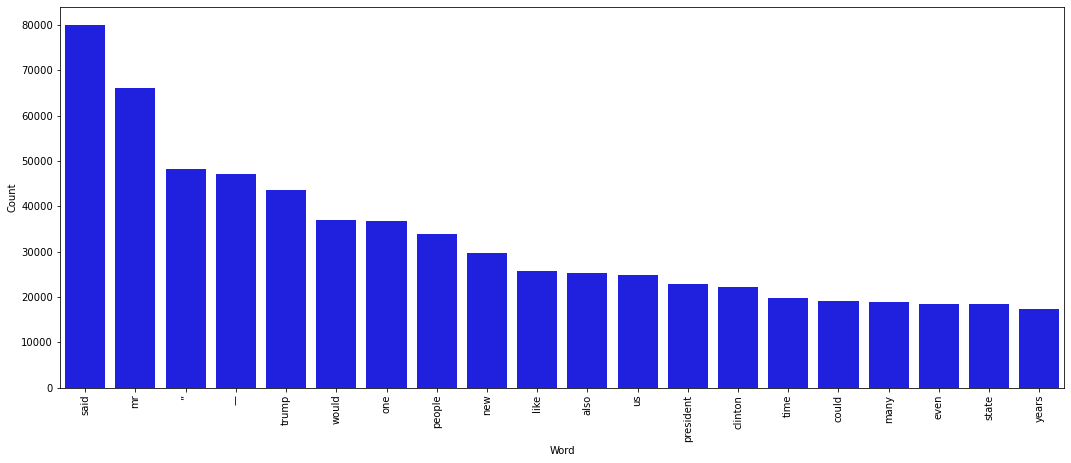

In [27]:
# Most frequent words in news article
counter(data["news"],20)

### Remove Punctuation

In [28]:
# initializing string 
data = data
  
# printing original string 
print(data) 
  
# initializing punctuations string  
punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~--'''
  
# Removing punctuations in string 
# Using loop + punctuation string 
for ele in data:  
    if ele in punc:  
        data = data.replace(ele, "")

                                                    news  label
0      washington — sonny perdue’s telling georgians ...      0
1      houston — venezuela plan tactical approach des...      0
2      sunday abc’s “this week” discussing republican...      0
3      augusta — beleaguered republican governor main...      0
4      finian cunningham written extensively internat...      1
...                                                  ...    ...
20795          youll dog licking vomit chinese overlords      1
20796  rixon stewart november 5 2016 rixon stewart — ...      1
20797  posted eddie know dakota access pipeline prote...      1
20798  it’s officially summer society boutique societ...      0
20799  emory university atlanta georgia announced fun...      0

[20761 rows x 2 columns]


### Modelling

In [29]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")


In [30]:
# Split the Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data['news'], data.label, test_size=0.2, random_state=0)

### Logistic Regression

In [31]:
# Vectorizing and applying TF-IDF
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 95.33%


Confusion matrix, without normalization


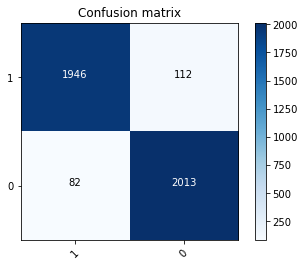

In [32]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['1', '0'])

### Decision TreeClassifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 89.41%


Confusion matrix, without normalization


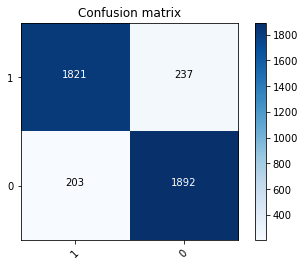

In [34]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['1', '0'])

### Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 90.34%


Confusion matrix, without normalization


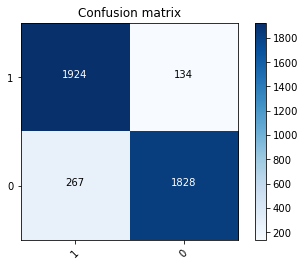

In [36]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['1', '0'])

### MultinomialNB

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [38]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

accuracy:   0.839
Confusion matrix, without normalization


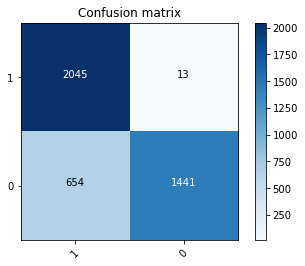

In [39]:
import itertools
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['1', '0'])

### PassiveAggressiveClassifier

In [40]:
from sklearn.metrics import classification_report,f1_score,log_loss
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.966
Confusion matrix, without normalization


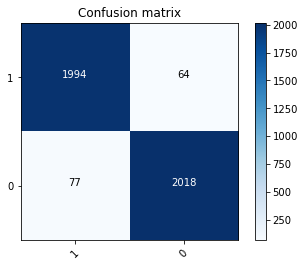

In [41]:
import itertools
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['1', '0'])

In [42]:
clf = MultinomialNB(alpha=0.1)

In [43]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.92415
Alpha: 0.10 Score: 0.91548
Alpha: 0.20 Score: 0.90200
Alpha: 0.30 Score: 0.89116
Alpha: 0.40 Score: 0.87985
Alpha: 0.50 Score: 0.86997
Alpha: 0.60 Score: 0.86371
Alpha: 0.70 Score: 0.85384
Alpha: 0.80 Score: 0.84854
Alpha: 0.90 Score: 0.84421


In [44]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

0 -11.965287920334536 000
0 -7.442785800484488 twitter
0 -7.285055575500797 follow
0 -6.776528428503773 breitbart
0 -6.706879055624421 said
0 -6.249631301066487 com
0 -6.154605797367895 mr
0 -5.528286895687819 ms
0 -5.254309236335267 2017
0 -4.210655680242737 president
0 -3.5237964851646577 sunday
0 -3.150680740402048 islamic
0 -3.111250795848577 saturday
0 -3.0759832098110897 ap
0 -3.032135851570406 https
0 -3.0276104932505183 administration
0 -2.907202663190621 march
0 -2.8873232200279584 mrs
0 -2.886266312916599 milo
0 -2.8108553422723555 pamkeynen
0 -2.7534275737930645 pic
0 -2.672654750952842 tillerson
0 -2.5513864602681977 dr
0 -2.515498576899505 pam
0 -2.4948320012515484 executive
0 -2.416349899808176 macron
0 -2.4050015798395066 spicer
0 -2.375539587829135 monday
0 -2.3251892272238797 decision
0 -2.274810286242357 victim

1 6.992713075310515 october
1 6.466294762496634 november
1 5.9519252200436865 2016
1 5.639107156462073 presidentelect
1 4.816676940599473 hillary
1 4.76014700

In [45]:
feature_names = tfidf_vectorizer.get_feature_names()

In [46]:
### Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-6.764843619974878, 'clinton'),
 (-6.837490997527048, 'trump'),
 (-7.023851036185938, 'hillary'),
 (-7.468148074104434, 'people'),
 (-7.475255247921301, 'election'),
 (-7.515611523176769, '2016'),
 (-7.60180931245262, 'fbi'),
 (-7.7151044330848215, 'russia'),
 (-7.747169508274432, 'said'),
 (-7.820612484720978, 'new'),
 (-7.830929059468711, 'world'),
 (-7.853639459017674, 'obama'),
 (-7.858168107296289, 'like'),
 (-7.875668917964109, 'war'),
 (-7.907540399223108, 'campaign'),
 (-7.911037466945518, 'state'),
 (-7.923139627601661, 'media'),
 (-7.940793807718276, 'president'),
 (-7.957414134583639, 'emails'),
 (-7.958101171752253, 'donald')]

In [47]:
### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-12.515911247639954, '0001'),
 (-12.515911247639954, '0009'),
 (-12.515911247639954, '000c'),
 (-12.515911247639954, '000s'),
 (-12.515911247639954, '000th'),
 (-12.515911247639954, '0012'),
 (-12.515911247639954, '0024'),
 (-12.515911247639954, '0115'),
 (-12.515911247639954, '0134'),
 (-12.515911247639954, '014'),
 (-12.515911247639954, '019'),
 (-12.515911247639954, '020'),
 (-12.515911247639954, '0200gmt'),
 (-12.515911247639954, '021'),
 (-12.515911247639954, '0230'),
 (-12.515911247639954, '0250'),
 (-12.515911247639954, '030'),
 (-12.515911247639954, '032'),
 (-12.515911247639954, '0345'),
 (-12.515911247639954, '039')]

### Saving the best model

In [48]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(linear_clf, open(filename, 'wb'))
 